# Arsenal vs Manchester United - 25.01.2026

This project generates a shot map of the football match, with Arsenal shots outlined in red and white and Manchester United shots outlined in black and blue, for the respective kits both teams were wearing. 

Arsenal are shooting from left to right, while Manchester United are shooting from right to left. 

Furthermore, both goals and expected goals for each team are included in the figure. 

Data was sourced from Understat's API. 

Import relevant libraries. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import understatapi
from mplsoccer import Pitch

client = understatapi.UnderstatClient()

Extract data from API and separate Arsenal and Manchester United data. 

In [2]:
shot_data = client.match(match='28999').get_shot_data()

ARS_shots = pd.DataFrame(shot_data["h"])
MUN_shots = pd.DataFrame(shot_data["a"])

The x and y values were in a string datatype. They have been converted and scaled for the mpl soccer pitch dimensions (120,80). 

In [3]:
ARS_shots["X"] = pd.to_numeric(ARS_shots["X"]) * 120
ARS_shots["Y"] = 80 - (pd.to_numeric(ARS_shots["Y"] ) * 80 )

Separated shots which resulted in a goal and those that didn't. 
Generated xG scaling for the scatter plot to indicate the relative threat of each shot. 
Also summed the total xG of all shots. 

In [4]:
ARS_goals = ARS_shots[ARS_shots["result"] == "Goal"]
ARS_non_goals = ARS_shots[ARS_shots["result"] != "Goal"]

ARS_goal_xG_scaling = (pd.to_numeric(ARS_goals["xG"]) * 2000) + 20
ARS_non_goal_xG_scaling = (pd.to_numeric(ARS_non_goals["xG"]) * 2000) + 20

ARS_total_xG = round(pd.to_numeric(ARS_shots['xG']).sum(), 2)

In [5]:
ARS_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,665419,6,BlockedShot,99.360004,21.920001,0.02427287958562374,Declan Rice,h,5553,OpenPlay,2025,RightFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,Leandro Trossard,Pass
1,665420,9,MissedShots,102.600000,39.120001,0.06534355133771896,Leandro Trossard,h,7698,FromCorner,2025,RightFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,NaN,None
2,665421,11,BlockedShot,94.800000,48.239999,0.010455106385052204,Bukayo Saka,h,7322,FromCorner,2025,RightFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,Declan Rice,Chipped
3,665422,14,BlockedShot,108.719998,49.520001,0.09759785979986191,Declan Rice,h,5553,OpenPlay,2025,RightFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,William Saliba,Pass
4,665423,17,SavedShot,113.880002,42.160001,0.083915114402771,Martín Zubimendi,h,7526,SetPiece,2025,Head,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,Declan Rice,Aerial


In [6]:
MUN_shots["X"] = 120 - (pd.to_numeric(MUN_shots["X"]) * 120)
MUN_shots["Y"] = pd.to_numeric(MUN_shots["Y"]) * 80

In [7]:
MUN_goals = MUN_shots[(MUN_shots["result"] == 'Goal' )|(MUN_shots["result"] == 'OwnGoal')] 
MUN_non_goals = MUN_shots[MUN_shots["result"] != 'Goal']

MUN_goal_xG_scaling = ((pd.to_numeric(MUN_goals["xG"])) * 2000) + 20 
MUN_non_goal_xG_scaling = ((pd.to_numeric(MUN_non_goals["xG"])) * 2000) + 20

MUN_total_xG = round(pd.to_numeric(MUN_shots['xG']).sum(), 2)

In [8]:
MUN_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,665424,22,BlockedShot,35.280002,45.760001,0.013740325346589088,Lisandro Martínez,a,10802,OpenPlay,2025,LeftFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,Kobbie Mainoo,Pass
1,665425,22,BlockedShot,29.280002,36.560001,0.023903679102659225,Kobbie Mainoo,a,11174,OpenPlay,2025,RightFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,Casemiro,BallTouch
2,665427,28,OwnGoal,116.880000,40.079999,0,Lisandro Martínez,a,10802,OpenPlay,2025,RightFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,NaN,None
3,665428,30,MissedShots,23.160004,52.479999,0.052209969609975815,Bruno Fernandes,a,1228,OpenPlay,2025,RightFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,Bryan Mbeumo,Pass
4,665429,33,MissedShots,13.439996,45.039999,0.07418148219585419,Bruno Fernandes,a,1228,OpenPlay,2025,RightFoot,28999,Arsenal,Manchester United,2,3,2026-01-25 16:30:00,NaN,None


Plot the figure. 

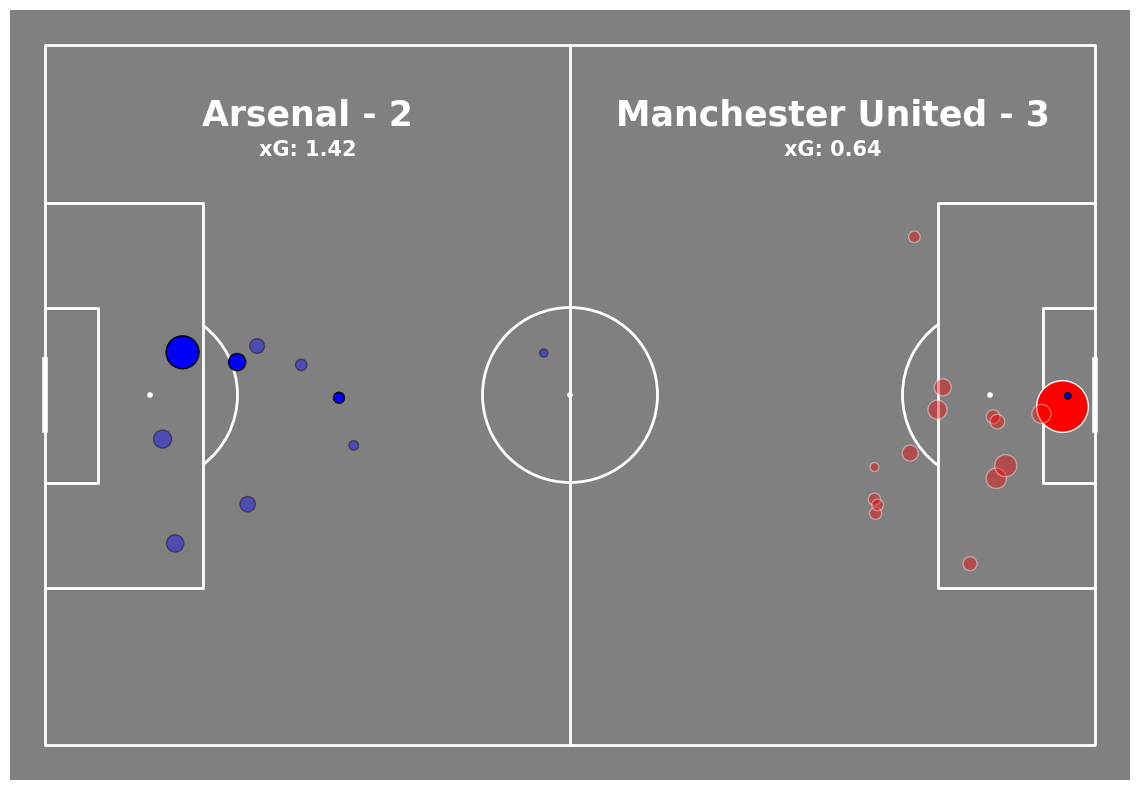

<Figure size 640x480 with 0 Axes>

In [9]:
pitch = Pitch(pitch_color='grey', line_color='white')  
fig, ax = pitch.draw(figsize=(16,8))
pitch.scatter(ARS_goals["X"], ARS_goals["Y"], ax=ax, color = 'r', edgecolor='w', s=ARS_goal_xG_scaling)
pitch.scatter(ARS_non_goals["X"], ARS_non_goals["Y"], ax=ax, color = 'r', edgecolor='w', alpha=0.4, s=ARS_non_goal_xG_scaling)
ax.text(30, 8, 'Arsenal - 2', fontsize=25, fontweight='bold', ha='center', va='center', color = 'w')
ax.text(30, 12, f"xG: {ARS_total_xG}", ha='center', va='center', fontsize=15, color = 'w', fontweight='bold')
pitch.scatter(MUN_goals["X"], MUN_goals["Y"], ax=ax, color='blue',edgecolor='black', s=MUN_goal_xG_scaling)
pitch.scatter(MUN_non_goals["X"], MUN_non_goals["Y"], ax=ax, alpha=0.4, color='blue',edgecolor='black', s=MUN_non_goal_xG_scaling)
ax.text(90, 8, 'Manchester United - 3', fontsize=25, fontweight='bold', ha='center', va='center', color = 'w')
ax.text(90, 12, f"xG: {MUN_total_xG}", ha='center', va='center', fontsize=15, color = 'w', fontweight='bold')
plt.savefig("Arsenal_ManchesterUnited_25.01.2026.png", bbox_inches="tight")
plt.show()
plt.clf()